https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data

# we need to study how holiday and oil price can affect the sales of stores over the years

# After analyzing possible effects we can build a model on top of the final data

In [2]:
import pandas as pd
import numpy as np
import statsmodels as st
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_df = pd.read_csv("/workspaces/Time_Series_projects/Store_Sales/Data/train.csv",
                       usecols=['date','store_nbr','family','sales','onpromotion'],parse_dates=True)
train_df.head()

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [4]:
train_df.shape

(3000888, 5)

In [5]:
holiday_df = pd.read_csv("/workspaces/Time_Series_projects/Store_Sales/Data/holidays_events.csv")
holiday_df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [6]:
oil_df = pd.read_csv("/workspaces/Time_Series_projects/Store_Sales/Data/oil.csv")
oil_df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [7]:
stores_df = pd.read_csv("/workspaces/Time_Series_projects/Store_Sales/Data/stores.csv")
stores_df.head() 

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [8]:
transaction_df = pd.read_csv("/workspaces/Time_Series_projects/Store_Sales/Data/transactions.csv")
transaction_df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [9]:
merge1_df = train_df.merge(
    stores_df,
    how="left",
    on="store_nbr"
).merge(
    oil_df,
    how="left",
    on="date"
)

In [10]:
merge1_df.shape

(3000888, 10)

In [11]:
merge1_df.head()

,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN
1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN
2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN
3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN
4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN


In [12]:
holiday_df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [13]:
holiday_df.shape

(350, 6)

In [14]:
holiday_df.drop_duplicates("date")

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
344,2017-12-22,Holiday,Local,Salinas,Cantonizacion de Salinas,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [15]:
merge2_df = merge1_df.merge(
    holiday_df.drop_duplicates("date"),
    how="left",
    on="date"
)
merge2_df = merge2_df.sort_values(["date"],ascending=True)

In [16]:
merge2_df.head()

,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1194,2013-01-01,42,CELEBRATION,0.0,0,Cuenca,Azuay,D,2,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1193,2013-01-01,42,BREAD/BAKERY,0.0,0,Cuenca,Azuay,D,2,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1192,2013-01-01,42,BOOKS,0.0,0,Cuenca,Azuay,D,2,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1191,2013-01-01,42,BEVERAGES,0.0,0,Cuenca,Azuay,D,2,NaN,Holiday,National,Ecuador,Primer dia del ano,False


In [17]:
merge2_df["type_y"].value_counts()

type_y
Holiday       270864
Event          87318
Additional     64152
Transfer       14256
Work Day        7128
Bridge          5346
Name: count, dtype: int64

In [41]:
merge2_df["transferred"].value_counts()

transferred
False    433026
True      16038
Name: count, dtype: int64

In [49]:
merge2_df[
   (merge2_df['transferred']==True) & (merge2_df['description']=='Independencia de Guayaquil')
   & (merge2_df['date'].str.contains('2013'))
]['date'].unique()

array(['2013-10-09'], dtype=object)

: 

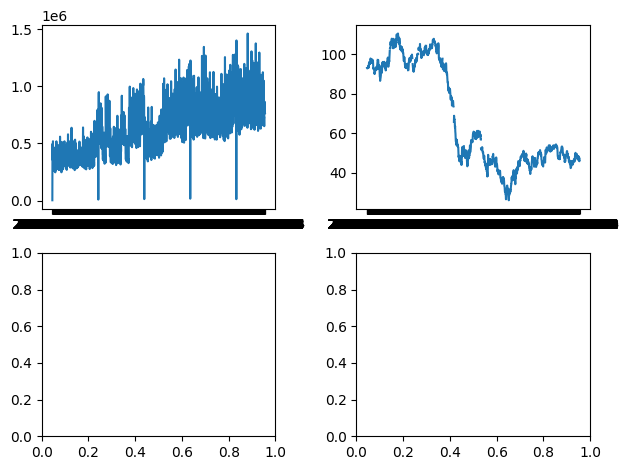

In [36]:
def show_plots():
    fig,ax = plt.subplots(nrows=2,ncols=2)
    ax1,ax2,ax3,ax4 = ax[0,0],ax[0,1],ax[1,0],ax[1,1]
    ax2.plot(oil_df['date'],oil_df['dcoilwtico'])
    ax1.plot(
        train_df.groupby(['date']).agg(Sum_sale=('sales','sum')).reset_index()['date'],
        train_df.groupby(['date']).agg(Sum_sale=('sales','sum')).reset_index()['Sum_sale'],
    )
    plt.tight_layout()
    plt.show()


show_plots()